In [166]:
#Import Libraries

import pandas as pd
import sqlite3
conn = sqlite3.connect('lahman2016.sqlite')
df = pd.read_sql_query("select * from Teams", conn)

In [167]:
# Dropping columns
df = df.drop(columns=['CS', 'HBP'])

In [168]:
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())


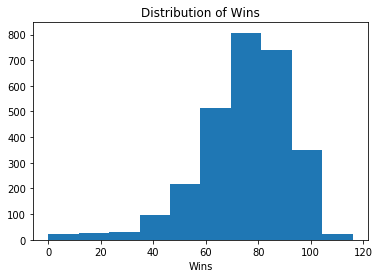

In [169]:
#import matplotlib
import matplotlib.pyplot as plt

#matplotlib plots inline
%matplotlib inline

#Plotting distrubution of wins
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()


In [170]:
# Creating bins for the win column
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5
    
df['win_bins'] = df['W'].apply(assign_win_bins)

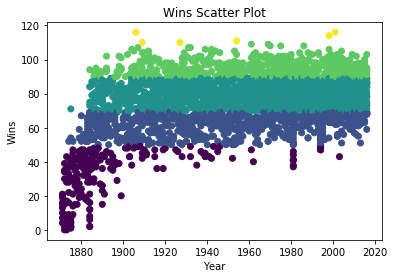

In [171]:
#Plotting scatter graph of Year vs.Wins
plt.scatter(df['yearID'], df['W'], c= df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

In [172]:
#Filter for rows where 'yearID' is greater than 1970

df = df[df['yearID'] > 1969]

In [173]:
# Create runs per year and games per year dictionaries
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games
        
print(runs_per_year)
print(games_per_year)

{1970: 16880, 1971: 15073, 1972: 13706, 1973: 16376, 1974: 16046, 1975: 16295, 1976: 15492, 1977: 18803, 1978: 17251, 1979: 18713, 1980: 18053, 1981: 11147, 1982: 18110, 1983: 18170, 1984: 17921, 1985: 18216, 1986: 18545, 1987: 19883, 1988: 17380, 1989: 17405, 1990: 17919, 1991: 18127, 1992: 17341, 1993: 20864, 1994: 15752, 1995: 19554, 1996: 22831, 1997: 21604, 1998: 23297, 1999: 24691, 2000: 24971, 2001: 23199, 2002: 22408, 2003: 22978, 2004: 23376, 2005: 22325, 2006: 23599, 2007: 23322, 2008: 22585, 2009: 22419, 2010: 21308, 2011: 20808, 2012: 21017, 2013: 20255, 2014: 19761, 2015: 20647, 2016: 21744}
{1970: 3888, 1971: 3876, 1972: 3718, 1973: 3886, 1974: 3890, 1975: 3868, 1976: 3878, 1977: 4206, 1978: 4204, 1979: 4198, 1980: 4210, 1981: 2788, 1982: 4214, 1983: 4218, 1984: 4210, 1985: 4206, 1986: 4206, 1987: 4210, 1988: 4200, 1989: 4212, 1990: 4210, 1991: 4208, 1992: 4212, 1993: 4538, 1994: 3200, 1995: 4034, 1996: 4534, 1997: 4532, 1998: 4864, 1999: 4856, 2000: 4858, 2001: 4858, 200

In [174]:
# Create MLB runs per game (per year) dictionary
mlb_runs_per_game = {}
for k, v in games_per_year.items():
    year = k 
    games = v 
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games
    
print(mlb_runs_per_game)

{1970: 4.341563786008231, 1971: 3.8888028895768834, 1972: 3.6863905325443787, 1973: 4.214101904271745, 1974: 4.124935732647815, 1975: 4.21277145811789, 1976: 3.99484270242393, 1977: 4.470518307180218, 1978: 4.103472882968601, 1979: 4.457598856598381, 1980: 4.2881235154394295, 1981: 3.998206599713056, 1982: 4.297579496915045, 1983: 4.307728781412992, 1984: 4.256769596199525, 1985: 4.330955777460771, 1986: 4.409177365668093, 1987: 4.722802850356294, 1988: 4.1380952380952385, 1989: 4.132241215574549, 1990: 4.256294536817102, 1991: 4.307747148288973, 1992: 4.1170465337132, 1993: 4.597620096959012, 1994: 4.9225, 1995: 4.847297967278136, 1996: 5.0355094838994265, 1997: 4.766990291262136, 1998: 4.789679276315789, 1999: 5.0846375617792425, 2000: 5.140181144503911, 2001: 4.7754219843557015, 2002: 4.6183017312448476, 2003: 4.72798353909465, 2004: 4.813838550247117, 2005: 4.591731797614151, 2006: 4.857760395224372, 2007: 4.7967914438502675, 2008: 4.650947281713345, 2009: 4.612962962962963, 2010: 

In [175]:
#Create lists from mlb_runs_per_game dictionary

lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

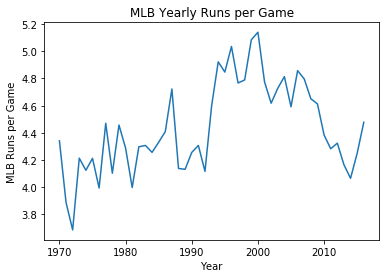

In [176]:
#create line plot of Year vs. MLB runs per Game
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')

plt.show()

In [177]:
# Creating "year_label" column, which will give your algorithm information about how certain years are related 
# (Dead ball eras, Live ball/Steroid Eras)

def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
        
# Add `year_label` column to `df`    
df['year_label'] = df['yearID'].apply(assign_label)

dummy_df = pd.get_dummies(df['year_label'], prefix='era')

# Concatenate `df` and `dummy_df`
df = pd.concat([df, dummy_df], axis=1)

df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,PPF,teamIDBR,teamIDlahman45,teamIDretro,win_bins,year_label,era_5,era_6,era_7,era_8
1541,1970,AL,BAL,BAL,E,1,162,81.0,108,54,...,98,BAL,BAL,BAL,4,5,1,0,0,0
1542,1970,AL,BOS,BOS,E,3,162,81.0,87,75,...,107,BOS,BOS,BOS,3,5,1,0,0,0
1543,1970,AL,CAL,ANA,W,3,162,81.0,86,76,...,97,CAL,CAL,CAL,3,5,1,0,0,0
1544,1970,AL,CHA,CHW,W,6,162,84.0,56,106,...,102,CHW,CHA,CHA,2,5,1,0,0,0
1545,1970,AL,CLE,CLE,E,5,162,81.0,76,86,...,105,CLE,CLE,CLE,3,5,1,0,0,0


In [178]:
# Create column for MLB runs per game from the mlb_runs_per_game dictionary
def assign_mlb_rpg(year):
    return mlb_runs_per_game[year]

df['mlb_rpg'] = df['yearID'].apply(assign_mlb_rpg)

In [179]:
#Convert years into decade bins and creating dummy variables
def assign_decade(year): 
    if year < 1920: 
        return 1910
    elif year >= 1920 and year <= 1929: 
        return 1920
    elif year >= 1930 and year <= 1939: 
        return 1930
    elif year >= 1940 and year <= 1949: 
        return 1940
    elif year >= 1950 and year <= 1959: 
        return 1950
    elif year >= 1960 and year <= 1969: 
        return 1960
    elif year >= 1970 and year <= 1979: 
        return 1970 
    elif year >= 1980 and year <= 1989: 
        return 1980
    elif year >= 1990 and year <= 1999: 
        return 1990
    elif year >= 2000 and year <= 2009: 
        return 2000
    elif year >= 2010 and year <= 2019: 
        return 2010
    
    
df['decade_label'] = df['yearID'].apply(assign_decade)
decade_df = pd.get_dummies(df['decade_label'], prefix='decade')
df = pd.concat([df, decade_df], axis=1)

# Drop unnecessary columns
df = df.drop(['yearID','year_label','decade_label'], axis=1)

In [180]:
# Create new features for Runs per Game and Runs Allowed per Game
df['R_per_game'] = df['R'] / df['G']
df['RA_per_game'] = df['RA'] / df['G']

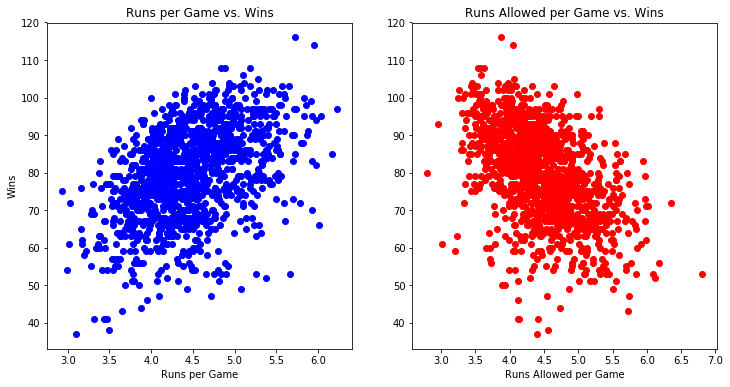

In [181]:
# Create scatter plots for runs per game vs. wins and runs allowed per game vs. wins
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['R_per_game'], df['W'], c='blue')
ax1.set_title('Runs per Game vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')

ax2.scatter(df['RA_per_game'], df['W'], c='red')
ax2.set_title('Runs Allowed per Game vs. Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()

In [182]:
df.corr()['W']

Rank          -0.769531
G              0.433487
Ghome          0.425704
W              1.000000
L             -0.627788
R              0.609125
AB             0.459159
H              0.548820
2B             0.357034
3B             0.119600
HR             0.391724
BB             0.492415
SO             0.126572
SB             0.176837
SF             0.293405
RA            -0.241952
ER            -0.216202
ERA           -0.456119
CG             0.094036
SHO            0.464282
SV             0.562360
IPouts         0.482024
HA             0.029532
HRA           -0.047160
BBA           -0.166957
SOA            0.325803
E             -0.122360
DP             0.098019
FP             0.292709
attendance     0.464819
BPF            0.031527
PPF           -0.103472
win_bins       0.903835
era_5          0.022929
era_6         -0.023992
era_7         -0.030739
era_8          0.050083
mlb_rpg       -0.001346
decade_1970    0.034783
decade_1980   -0.059671
decade_1990   -0.082932
decade_2000    0

In [192]:
# Create new DataFrame using only variables to be included in models
numeric_cols = ['G','R','AB','H','2B','3B',
                'HR','BB','SO','SB','RA','ER',
                'ERA','CG','SHO','SV','IPouts',
                'HA','HRA','BBA','SOA','E','DP',
                'FP','era_5','era_6','era_7','era_8',
                'decade_1970','decade_1980','decade_1990',
                'decade_2000','decade_2010','R_per_game',
                'RA_per_game','mlb_rpg','labels','W']

data = df[numeric_cols]

# Split data DataFrame into train and test sets
train = data.sample(frac=0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

x_train = train[attributes]
y_train = train['W']
x_test = test[attributes]
y_test = test['W']

In [193]:
# Import `LinearRegression` from `sklearn.linear_model`
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error

# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

# Determine mean absolute error
mae = mean_absolute_error(y_test, predictions)

# Print `mae`
print(mae)

2.4946412310317987


In [194]:
# Import `RidgeCV` from `sklearn.linear_model`
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(x_train, y_train)
predictions_rrm = rrm.predict(x_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

2.612955987818567
